In [54]:
!pip install "git+https://github.com/unifyai/langchain.git#egg=langchain&subdirectory=libs/langchain"


  Cloning https://github.com/unifyai/langchain.git to c:\users\ravin\appdata\local\temp\pip-install-6_mllcvt\langchain_5baf587e48474c88a5884a3491085487
  Resolved https://github.com/unifyai/langchain.git to commit d2cd99f238ff59e65cbba3132b062325b75b4524
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached langchain_text_splitters-0.2.0-py3-none-any.whl (23 kB)
  Using cached langchain_core-0.2.1-py3-none-any.whl (308 kB)
  Using cached langsmith-0.1.63-py3-none-any.whl (122 kB)
  Created wheel for langchain: filename=langchain-0.2.0-py3-none-any.whl size=973786 sha256=43a76aa5dbee22f37a5778280302bb6ada0895ec72dccd2d3453230cf128ae39
  Stored in directory: C:\Users\ravin\AppData\Local\Temp\pip-ephem-

  Running command git clone --filter=blob:none --quiet https://github.com/unifyai/langchain.git 'C:\Users\ravin\AppData\Local\Temp\pip-install-6_mllcvt\langchain_5baf587e48474c88a5884a3491085487'

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# install unify ai langchain
!pip install "git+https://github.com/unifyai/langchain.git#egg=langchain-unify&subdirectory=libs/partners/unify"

  Cloning https://github.com/unifyai/langchain.git to c:\users\ravin\appdata\local\temp\pip-install-8doyegeo\langchain-unify_82392598ce864925a8959ee4c5510fe3
  Resolved https://github.com/unifyai/langchain.git to commit d2cd99f238ff59e65cbba3132b062325b75b4524
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/unifyai/langchain.git 'C:\Users\ravin\AppData\Local\Temp\pip-install-8doyegeo\langchain-unify_82392598ce864925a8959ee4c5510fe3'

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# fill in the api keys
unifyapikey= None
wolframapikey=None
opwapikey=None

In [3]:
from langchain_unify.chat_models import ChatUnify

llm = ChatUnify(endpoint="gpt-3.5@openai",
                unify_api_key=unifyapikey, streaming=True)

llm.invoke("What is the capital of France?")

AIMessage(content='The capital of France is Paris.', response_metadata={'usage': {'completion_tokens': 7, 'prompt_tokens': 18, 'total_tokens': 25, 'cost': 2.4099999999999996e-05}, 'model': 'llama-2-70b-chat@lowest-input-cost', 'finish_reason': 'stop'}, id='run-a8abd911-45af-460b-a55b-2704fdbf9703-0')

In [ ]:
from langchain.memory import ConversationBufferMemory

In [ ]:
memory = ConversationBufferMemory(
     return_messages=True, memory_key="chat_history", output_key="output"
)

In [21]:
# duchduckgo search

from langchain_community.tools import DuckDuckGoSearchRun
from langchain.agents import initialize_agent, AgentType, AgentExecutor, ConversationalChatAgent
from langchain.memory import ConversationBufferMemory # to store the conversation history
from langchain_unify.chat_models import ChatUnify

llm = ChatUnify(endpoint="gpt-4o@openai",
                unify_api_key=unifyapikey, streaming=True)


ddg_search = DuckDuckGoSearchRun(name="ddg_search")

# tools = [ddg_search]
memory = ConversationBufferMemory()



agent = ConversationalChatAgent(
    tools=[ddg_search],
    # agent='chat-conversational-react-description',
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    llm=llm,
    #memory=memory,
    verbose=True,
    max_iterations=3,
    max_execution_time=10,
    # return_intermediate_steps=True,
    handle_parsing_errors=True,
    early_stopping_method='generate',
)


#print(agent.invoke("whats the name of the president in united states?",memory=memory))
# print(agent.invoke("what is the capital",memory=memory))

# agent_executor = AgentExecutor(
#     agent=agent,
#     tools=[ddg_search],
#     verbose=True,
#     handle_parsing_errors=True,
# )

# print(agent_executor.invoke("what is the capital of france"))


# # Function to handle user input and agent response
# def chat():
#     print("You can start chatting with the agent. Type 'exit' to end the conversation.")
#     while True:
#         user_input = input("You: ")
#         if user_input.lower() == 'exit':
#             print("Ending the conversation. Goodbye!")
#             break
#         try:
#             response = agent.invoke(user_input,memory=memory)
#             print(f"Agent: {response}")
#         except Exception as e:
#             print(f"An error occurred: {e}")

# # Start the chat session
# chat()

e:\contribution\venv\ai_agent_venv\lib\site-packages\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The class `ConversationalChatAgent` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use create_json_chat_agent instead.
  warn_deprecated(


KeyError: 'llm_chain'

In [20]:
# best working duckduckgo search
from langchain.memory import ConversationBufferMemory
from langchain.agents import AgentExecutor, ConversationalChatAgent

llm = ChatUnify(endpoint="gpt-4o@openai",unify_api_key=unifyapikey)
tools = [DuckDuckGoSearchRun(name="Search")]
chat_agent = ConversationalChatAgent.from_llm_and_tools(llm=llm, tools=tools)

memory = ConversationBufferMemory(
     return_messages=True, memory_key="chat_history", output_key="output"
)
executor = AgentExecutor.from_agent_and_tools(
        agent=chat_agent,
        tools=tools,
        verbose=True,
        memory=memory,
        #return_intermediate_steps=True,
        handle_parsing_errors=True,
)

executor.invoke({"input":"what is the capital of france"})


NameError: name 'DuckDuckGoSearchRun' is not defined

In [ ]:
executor.invoke({"input":"who is the president"})

In [ ]:
executor.invoke({"input":"what are famous tourist spot"})

In [ ]:
executor.invoke({"input":"what language they will speak"})   

In [ ]:
# duchduckgo search

from langchain_community.tools import DuckDuckGoSearchRun
from langchain.agents import initialize_agent, AgentType
from langchain.memory import ConversationBufferWindowMemory
from langchain_unify.chat_models import ChatUnify

llm = ChatUnify(endpoint="llama-2-13b-chat@anyscale",
                unify_api_key=unifyapikey, streaming=True)


ddg_search = DuckDuckGoSearchRun(name="ddg_search")

# tools = [ddg_search]
memory = ConversationBufferWindowMemory()

agent = initialize_agent(
    tools=[ddg_search],
    # agent='chat-conversational-react-description',
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    llm=llm,
    memory=memory,
    verbose=True,
    max_iterations=3,
    max_execution_time=10,
    # return_intermediate_steps=True,
    handle_parsing_errors=True,
    early_stopping_method='generate',
)


# print(agent.invoke("whats the name of the president in united states?"))



# Function to handle user input and agent response
def chat():
    print("You can start chatting with the agent. Type 'exit' to end the conversation.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Ending the conversation. Goodbye!")
            break
        try:
            response = agent.invoke(user_input,memory=memory)
            print(f"Agent: {response}")
        except Exception as e:
            print(f"An error occurred: {e}")

# Start the chat session
chat()

In [ ]:
# openweathermap-api

from langchain.agents import AgentType, initialize_agent, load_tools
from langchain_unify.chat_models import ChatUnify
import os

os.environ["OPENWEATHERMAP_API_KEY"] = opwapikey

llm = ChatUnify(endpoint="gpt-4-turbo@openai", unify_api_key=unifyapikey, streaming=True)


tools = load_tools(["openweathermap-api"],llm)

agent = initialize_agent(
    tools=tools, 
    llm=llm, 
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, 
    verbose=True,
    max_iterations=3,
    max_execution_time=60,
    return_intermediate_steps=True,
    handle_parsing_errors=True,
    early_stopping_method='generate'
)

#print(tools)
print(agent.invoke("Whats the current weather in chennai?"))


In [ ]:
from langchain.agents import load_tools
import os

os.environ["OPENWEATHERMAP_API_KEY"] = opwapikey


llm = ChatUnify(endpoint="gpt-4o@openai",unify_api_key=unifyapikey)
tools = load_tools(["openweathermap-api"],llm)
chat_agent = ConversationalChatAgent.from_llm_and_tools(llm=llm, tools=tools)

memory = ConversationBufferMemory(
     return_messages=True, memory_key="chat_history", output_key="output"
)
executor = AgentExecutor.from_agent_and_tools(
        agent=chat_agent,
        tools=tools,
        verbose=True,
        memory=memory,
        #return_intermediate_steps=True,
        handle_parsing_errors=True,
)

executor.invoke({"input":"what is the weather for next couple of days in london"})

In [ ]:

executor.invoke({"input":"is it rainy tommorrow"})

In [ ]:
executor.invoke({"input":"when is the next rainny day with exact date"})

In [8]:
#from langchain_community.utilities.wolfram_alpha import WolframAlphaAPIWrapper
from langchain.agents import ConversationalChatAgent, AgentExecutor, load_tools
from langchain_unify.chat_models import ChatUnify
import os

llm = ChatUnify(endpoint="llama-2-13b-chat@anyscale", unify_api_key=unifyapikey, streaming=True)

os.environ["WOLFRAM_ALPHA_APPID"] = wolframapikey

tools_name = ["wolfram-alpha"]
tools = load_tools(tools_name)
chat_agent = ConversationalChatAgent.from_llm_and_tools(llm=llm, tools=tools)
executor = AgentExecutor.from_agent_and_tools(
        agent=chat_agent,
        tools=tools,
        memory=memory,
        #return_intermediate_steps=True,
        handle_parsing_errors=True,
)

# agent = initialize_agent(
#      tools=tools,
#      agent= "zero-shot-react-description",
#      llm=llm,
#      verbose=True,
#      max_iterations=3,
#      max_execution_time=60,
#      return_intermediate_steps=True,
#      handle_parsing_errors=True,
#      early_stopping_method='generate',

#  )

print(executor.invoke({"input":"What is the distance diameter of earth?"}))

{'input': 'What is the distance diameter of earth?', 'chat_history': [HumanMessage(content='What is the equation for gravity?'), AIMessage(content="The equation for gravity is approximately 9.82 m/s^2, or 32.22 ft/s^2, or 982 cm/s^2. The escape velocity from the Earth's surface is around 11.19 km/s, or 11190 m/s, or 25020 mph."), HumanMessage(content='What is the distance diameter of earth?'), AIMessage(content='The average diameter of Earth is approximately 7,917.523 miles.'), HumanMessage(content='What is the distance diameter of earth?'), AIMessage(content='The average diameter of the Earth is approximately 7,917.523 miles.')], 'output': 'The average diameter of the Earth is approximately 7,917.523 miles.'}


In [9]:
print(executor.invoke({"input":"can you tell me in km"}))

{'input': 'can you tell me in km', 'chat_history': [HumanMessage(content='What is the equation for gravity?'), AIMessage(content="The equation for gravity is approximately 9.82 m/s^2, or 32.22 ft/s^2, or 982 cm/s^2. The escape velocity from the Earth's surface is around 11.19 km/s, or 11190 m/s, or 25020 mph."), HumanMessage(content='What is the distance diameter of earth?'), AIMessage(content='The average diameter of Earth is approximately 7,917.523 miles.'), HumanMessage(content='What is the distance diameter of earth?'), AIMessage(content='The average diameter of the Earth is approximately 7,917.523 miles.'), HumanMessage(content='can you tell me in km'), AIMessage(content='The average diameter of the Earth is approximately 12,742.018 kilometers.')], 'output': 'The average diameter of the Earth is approximately 12,742.018 kilometers.'}


In [10]:
print(executor.invoke({"input":"5+2+6*8-34"}))

{'input': '5+2+6*8-34', 'chat_history': [HumanMessage(content='What is the equation for gravity?'), AIMessage(content="The equation for gravity is approximately 9.82 m/s^2, or 32.22 ft/s^2, or 982 cm/s^2. The escape velocity from the Earth's surface is around 11.19 km/s, or 11190 m/s, or 25020 mph."), HumanMessage(content='What is the distance diameter of earth?'), AIMessage(content='The average diameter of Earth is approximately 7,917.523 miles.'), HumanMessage(content='What is the distance diameter of earth?'), AIMessage(content='The average diameter of the Earth is approximately 7,917.523 miles.'), HumanMessage(content='can you tell me in km'), AIMessage(content='The average diameter of the Earth is approximately 12,742.018 kilometers.'), HumanMessage(content='5+2+6*8-34'), AIMessage(content='Agent stopped due to iteration limit or time limit.')], 'output': 'Agent stopped due to iteration limit or time limit.'}


In [ ]:
# !pip install -q youtube-transcript-api
# !pip install -q pytube

In [ ]:
#no need to install that 
#!pip install -q yt-dlp youtube-dl pafy

In [49]:
from langchain_community.tools import YouTubeSearchTool
from IPython.display import YouTubeVideo
import ast

tool = YouTubeSearchTool()

ytvideo = tool.run("how to make a chappaati")
ytvideo_list = ast.literal_eval(ytvideo)
print(ytvideo_list)
print(type(ytvideo_list))

['https://www.youtube.com/watch?v=GkePsetNqPs&pp=ygUXaG93IHRvIG1ha2UgYSBjaGFwcGFhdGk%3D', 'https://www.youtube.com/watch?v=RHzRwUuf4Zk&pp=ygUXaG93IHRvIG1ha2UgYSBjaGFwcGFhdGk%3D']
<class 'list'>


In [99]:
class YouTubeSearch:
    def __init__(self):
        self.api = YouTubeSearchTool()

    def run(self, query):
        results = self.api.run(f"{query},3")
        print(results)
        list_results = ast.literal_eval(results)
        return list_results

In [100]:
yt=YouTubeSearch()
yt_result=yt.run("how to make a paper rocket")

print(yt_result)

['https://www.youtube.com/watch?v=0FTO2xtmoZQ&pp=ygUaaG93IHRvIG1ha2UgYSBwYXBlciByb2NrZXQ%3D', 'https://www.youtube.com/watch?v=KQYwYU_P1aM&pp=ygUaaG93IHRvIG1ha2UgYSBwYXBlciByb2NrZXQ%3D', 'https://www.youtube.com/watch?v=veyZNyurlwU&pp=ygUaaG93IHRvIG1ha2UgYSBwYXBlciByb2NrZXQ%3D']
['https://www.youtube.com/watch?v=0FTO2xtmoZQ&pp=ygUaaG93IHRvIG1ha2UgYSBwYXBlciByb2NrZXQ%3D', 'https://www.youtube.com/watch?v=KQYwYU_P1aM&pp=ygUaaG93IHRvIG1ha2UgYSBwYXBlciByb2NrZXQ%3D', 'https://www.youtube.com/watch?v=veyZNyurlwU&pp=ygUaaG93IHRvIG1ha2UgYSBwYXBlciByb2NrZXQ%3D']


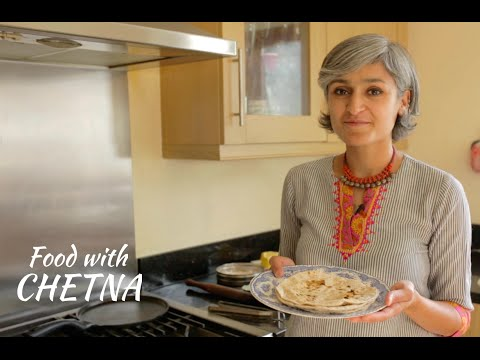

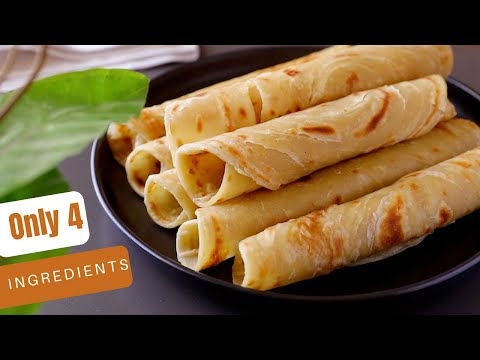

No video found for the URL: https://www.youtube.com/watch?v=L0fRM0feSgM&pp=ygUWaG93IHRvIG1ha2UgYSBjaGFwcGF0aQ%3D%3D


In [88]:
import ast
from langchain.document_loaders import YoutubeLoader
from IPython.display import display


class YouTubeVideoSearcher:
    def __init__(self):
        pass

    def search_and_display_videos(self, query, num_videos=3):
        api = YouTubeSearchTool()
        results = api.run(f"{query},{num_videos}")
        list_results = ast.literal_eval(results)
        if list_results:
            for url in list_results:
                loader = YoutubeLoader.from_youtube_url(url, add_video_info=True)
                result = loader.load()
                if result:
                    video = YouTubeVideo(id=result[0].metadata["source"], width=560, height=315)
                    display(video)
                else:
                    print(f"No video found for the URL: {url}")
        else:
            print("No thumbnail found for the provided query.")

# Example usage:
youtube_searcher = YouTubeVideoSearcher()
youtube_searcher.search_and_display_videos("how to make a chappati")


In [ ]:

import requests
from IPython.display import Image
class YouTubeVideoSearcher:
    def __init__(self):
        pass

    def display_thumbnail(self, url):
        loader = YoutubeLoader.from_youtube_url(url, add_video_info=True)
        result = loader.load()
        if result:
            thumbnail_url = result[0].metadata.get("thumbnail_url")
            if thumbnail_url:
                response = requests.get(thumbnail_url)
                if response.status_code == 200:
                    display(Image(response.content))
                else:
                    print(f"Failed to fetch thumbnail for the URL: {url}")
            else:
                print(f"No thumbnail found for the URL: {url}")
        else:
            print(f"No video found for the URL: {url}")

    # def search_and_display_videos(self, query, num_videos=3):
    #     api = YouTubeSearchTool()
    #     results = api.run(f"{query},{num_videos}")
    #     list_results = ast.literal_eval(results)
    #     if list_results:
    #         for url in list_results:
    #             self.display_thumbnail(url)
    #             self.display_video(url)
    #     else:
    #         print("No videos found for the provided query.")

    # def display_video(self, url):
    #     loader = YoutubeLoader.from_youtube_url(url, add_video_info=True)
    #     result = loader.load()
    #     if result:
    #         video = YouTubeVideo(id=result[0].metadata["source"], width=560, height=315)
    #         display(video)
    #     else:
    #         print(f"No video found for the URL: {url}")

# Example usage:
youtube_searcher = YouTubeVideoSearcher()
youtube_searcher.search_and_display_videos("chapati")


In [109]:
results = YouTubeSearchTool().run("mkbhd,3")
#print(results)
list_results = ast.literal_eval(results)

for url in list_results:
    loader = YoutubeLoader.from_youtube_url(url, add_video_info=True)
    result = loader.load()
    if result:
        thumbnail_url = result[0].metadata.get("thumbnail_url")
        title = result[0].metadata.get("title")
        print(title, thumbnail_url)
    else:
        print(f"No video found for the URL: {url}")
        
# loader = YoutubeLoader.from_youtube_url(results[0], add_video_info=True)
# result = loader.load()
# #print(result)
# thumbnail_url = result[0].metadata.get("thumbnail_url")
# title = result[0].metadata.get("title")
# print(title)
# #{"output":thumbnail_url}
# print(thumbnail_url)



['https://www.youtube.com/watch?v=ddTV12hErTc&pp=ygUFbWtiaGQ%3D', 'https://www.youtube.com/watch?v=b0I54yxpFjA&pp=ygUFbWtiaGQ%3D', 'https://www.youtube.com/watch?v=mGxIAwybD5A&pp=ygUFbWtiaGQ%3D']
Rabbit R1: Barely Reviewable https://i.ytimg.com/vi/ddTV12hErTc/hq720.jpg
Microsoft’s MacBook Killer? https://i.ytimg.com/vi/b0I54yxpFjA/hq720.jpg
Mercedes AMG EQE SUV: Ugly but Comfortable! https://i.ytimg.com/vi/mGxIAwybD5A/hq720.jpg


In [ ]:
from langchain_unify.chat_models import ChatUnify
from langchain.document_loaders import YoutubeLoader
from langchain.chains.summarize import load_summarize_chain
from langchain.prompts import PromptTemplate
from IPython.display import YouTubeVideo
from datetime import timedelta

url = 'https://www.youtube.com/watch?v=RHzRwUuf4Zk&pp=ygUXaG93IHRvIG1ha2UgYSBjaGFwcGFhdGk%3D'


loader = YoutubeLoader.from_youtube_url(url, add_video_info=True)

result = loader.load()
#print(result)

llm = ChatUnify(endpoint="gpt-4o@openai", unify_api_key=unifyapikey, streaming=True)


prompt_template = """Write a concise summary of the following text delimited by triple backquotes.
              Return your response in bullet points which covers the key points of the text.
              ```{text}```
              BULLET POINT SUMMARY:
  """

prompt = PromptTemplate(template=prompt_template, input_variables=["text"])

chain = load_summarize_chain(llm,chain_type="stuff",prompt=prompt)
summary = chain.invoke(result)

# Convert seconds to timedelta
video_length = timedelta(seconds = result[0].metadata['length'])

print (f"Found video from {result[0].metadata['author']} that {video_length} is long ")
print ("")

# print("Content :")
# print(result[0].page_content)
content = result[0].page_content
print("")
print("Summarized Content :")
print(summary['output_text'])

# thumbnail_url = result[0].metadata["thumbnail_url"] #thumbnail_url for the video
video = YouTubeVideo(id = result[0].metadata["source"],width=560, height=315)
display(video)

In [44]:
class VideoSummarizer:
    def __init__(self, url, unify_api_key, llm_selected, provider_selected):
        self.url = url
        self.unify_api_key = unify_api_key
        self.llm_selected = llm_selected
        self.provider_selected = provider_selected

    def summarize_video(self):
        loader = YoutubeLoader.from_youtube_url(self.url, add_video_info=True)
        result = loader.load()

        llm = ChatUnify(endpoint=f"{self.llm_selected}@{self.provider_selected}", unify_api_key=self.unify_api_key, streaming=True)

        prompt_template = """Write a concise summary of the following text delimited by triple backquotes.
                          Return your response in bullet points which covers the key points of the text.
                          ```{text}```
                          BULLET POINT SUMMARY:
                          """
        prompt = PromptTemplate(template=prompt_template, input_variables=["text"])

        chain = load_summarize_chain(llm, chain_type="stuff", prompt=prompt)
        summary = chain.invoke(result)
        summarized_content = summary['output_text']
        
        #video length
        video_length = timedelta(seconds=result[0].metadata['length'])
        vid_len=f"Found video from {result[0].metadata['author']} that {video_length} is long "
        print(vid_len)
        print (summarized_content)
        
    
    # def display_video(self):
    #     loader = YoutubeLoader.from_youtube_url(self.url, add_video_info=True)
    #     result = loader.load()
    #     #thumbnail_url = result[0].metadata["thumbnail_url"]
    #     video = YouTubeVideo(id=result[0].metadata["source"], width=560, height=315)
    #     return display(video)

# Example usage:
url = 'https://www.youtube.com/watch?v=RHzRwUuf4Zk&pp=ygUXaG93IHRvIG1ha2UgYSBjaGFwcGFhdGk%3D'
api_key = "jOIetrH1GL2QWUj5iZO5XVC6gR+VXm9pnYZE7y7ALNU="
llm_selected = "gpt-4o"
provider_selected = "openai"

summarizer = VideoSummarizer(url, api_key, llm_selected, provider_selected)
#summarizer.summarize_video()
#summarizer.display_video()


Found video from Phil's Kitchen that 0:08:15 is long 
Here is a concise summary of the text in bullet points:

**Introduction**

* The video is about making chapatis at home
* The recipe is easy and quick, requiring minimal ingredients
* The video is suitable for beginners

**Ingredients and Tools**

* All-purpose flour
* Salt
* Warm water
* Vegetable oil
* Rolling pin
* Kitchen towel
* Spatula
* Pan

**Step-by-Step Instructions**

* Mix flour and salt, then add warm water to form a sticky dough
* Knead the dough for 5-8 minutes until it becomes soft and sticky
* Add a tablespoon of vegetable oil and continue kneading for 3 minutes
* Rest the dough for 10 minutes, then divide it into small balls
* Roll each ball into an oval shape, then spread a small amount of oil on one side
* Roll the dough into a coil shape, then flatten it into a round shape
* Repeat the process with the remaining dough balls
* Cook the chapatis on a medium-heat pan with a small amount of oil, flipping each side u

In [ ]:
xxx=(chain.invoke(result))
print(len(chain.invoke(result)))


In [ ]:
print(xxx['output_text'])

In [ ]:
# from langchain_community.tools import DuckDuckGoSearchRun

# search= DuckDuckGoSearchRun()

# prompt = "what is temperature"

# print("searching for response....")
# se= search.run(prompt)
# print(se)
# %time

# print("generating response....")
# response = unify.generate(user_prompt= search.run(prompt),system_prompt="You should always summaraise for user easy understanding")
# print(response)
# %time

In [ ]:
#open waether map

from langchain_community.utilities import OpenWeatherMapAPIWrapper
import os

os.environ["OPENWEATHERMAP_API_KEY"] = opwapikey
weather = OpenWeatherMapAPIWrapper(openweathermap_api_key=opwapikey)

weather_prompt = ("london")

In [ ]:
print(weather.run(weather_prompt))


In [ ]:
# # wolfram alpha

# from langchain_community.utilities.wolfram_alpha import WolframAlphaAPIWrapper
# import os

# os.environ["WOLFRAM_ALPHA_APPID"] = "ETGVRAJ5"
# wolfram = WolframAlphaAPIWrapper()
# wolfram.run("What is 2x+5 = -3x + 7?")


In [ ]:
from langchain_unify.chat_models import ChatUnify

llm = ChatUnify(endpoint="gpt-3.5-turbo@openai", unify_api_key="jOIetrH1GL2QWUj5iZ7y7ALNU=", streaming=True)
# llm.invoke("hello")